## Logistics Regression Assignment

## Theory

#### 1. **What is Logistic Regression, and how does it differ from Linear Regression?**

* Logistic Regression is a **classification algorithm** that predicts the probability of a binary outcome (e.g. yes/no, 0/1).
* Linear Regression is a **regression algorithm** that predicts a continuous numeric value.
* Logistic Regression maps the output of a linear equation into the **\[0,1] range using the Sigmoid function**, whereas Linear Regression predicts raw numeric output.

#### 2. **Mathematical Equation of Logistic Regression**

$$
p = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n)}}
$$

Where $p$ is the predicted probability of the class label being 1.

#### 3. **Why use the Sigmoid function?**

* The Sigmoid (Logistic) function maps any real number into the range **(0,1)**, making it suitable for predicting probabilities.

#### 4. **Cost function of Logistic Regression**

* Logistic Regression uses **Binary Cross-Entropy (Log Loss)** as its cost:

$$
J(\beta) = -\frac{1}{m}\sum_{i=1}^m[y^{(i)}\log(h_\beta(x^{(i)}))+(1-y^{(i)})\log(1-h_\beta(x^{(i)}))]
$$

#### 5. **Regularization in Logistic Regression**

* **Regularization** penalizes large coefficients to prevent **overfitting**.
* Common types:

  * L1 (Lasso): induces sparsity
  * L2 (Ridge): shrinks coefficients
  * ElasticNet: combination of L1 & L2

#### 6. **Difference between Lasso, Ridge, and Elastic Net**

* **Lasso (L1)**: Adds absolute sum of coefficients as penalty → can zero coefficients.
* **Ridge (L2)**: Adds squared sum of coefficients as penalty → shrinks coefficients but rarely zeros them.
* **Elastic Net**: Combination of L1 and L2 → balance between feature selection and shrinkage.

#### 7. **When to use Elastic Net?**

* When we have **many correlated features** and want the benefits of both feature selection (Lasso) and stability (Ridge).
* It improves performance over using Lasso or Ridge individually.

#### 8. **Impact of regularization parameter (λ)**

* **λ (regularization strength)** controls the amount of shrinkage:

  * Large λ → stronger penalty → smaller coefficients → underfitting
  * Small λ → weak penalty → complex model → overfitting

#### 9. **Key assumptions of Logistic Regression**

* Binary or categorical target
* No perfect multicollinearity
* Logit is a linear combination of features
* Large sample size
* Observations independent

#### 10. **Alternatives to Logistic Regression**

* SVM
* Decision Trees / Random Forest
* Naive Bayes
* K-Nearest Neighbors
* Neural Networks

#### 11. **Classification evaluation metrics**

* Accuracy, Precision, Recall, F1-Score, ROC-AUC, Confusion Matrix

#### 12. **Class imbalance impact**

* Model can become biased towards the majority class.
* Logistic Regression may misclassify the minority class unless techniques like:

  * class weights
  * SMOTE
  * undersampling/oversampling
    are used.

#### 13. **Hyperparameter Tuning in Logistic Regression**

* Searching optimal hyperparameters (e.g. C, penalty, solver) using GridSearchCV or RandomizedSearchCV.

#### 14. **Solvers in Logistic Regression & which one to use**

* Common solvers: liblinear, lbfgs, saga, newton-cg.
* liblinear: small datasets, supports L1/L2
* lbfgs: good for multiclass, large datasets
* saga: supports L1, ElasticNet, large sparse datasets

#### 15. **Multiclass classification in Logistic Regression**

* Extended using:

  * **One-vs-Rest (OvR)**: fit one binary classifier per class
  * **Softmax (Multinomial)**: directly models the class probabilities jointly

#### 16. **Advantages and disadvantages of Logistic Regression**

##### Advantages:

* Interpretable
* Efficient training
* Less prone to overfitting with regularization

##### Disadvantages:
* Linear decision boundary
* Poor on very complex/non-linear problems
* Sensitive to outliers

#### 17. **Use cases of Logistic Regression**

* Spam detection
* Medical diagnosis
* Credit risk
* Customer churn

#### 18. **Difference between Softmax and Logistic Regression**

* Softmax handles **multiclass problems** directly.
* Logistic Regression is for **binary**.

#### 19. **OvR vs Softmax**

* **OvR** is simple and can scale to large datasets.
* **Softmax** is more coherent and accurate when classes are mutually exclusive.

#### 20. **Interpreting coefficients**

* Coefficients indicate the log-odds change for a one-unit change in the feature, holding other variables constant.



## Practical

1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
y = (y == 0).astype(int)  # Binary target for demonstration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy

In [2]:
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)
print("L1 Accuracy:", accuracy_score(y_test, model.predict(X_test)))


L1 Accuracy: 1.0


3. Write a Python program to train Logistic Regression with L2 regularization (penalty='l2'). Print model accuracy and coefficients

In [3]:
model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
print("L2 Accuracy:", accuracy_score(y_test, model.predict(X_test)))
print("Coefficients:\n", model.coef_)


L2 Accuracy: 1.0
Coefficients:
 [[-0.43107698  0.84570847 -2.15658006 -0.88940818]]


4. Write a Python program to train Logistic Regression with Elastic Net (penalty='elasticnet').

In [4]:
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)
model.fit(X_train, y_train)
print("Elastic Net Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Elastic Net Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


5. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'.

In [5]:
model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
print("OvR multiclass Accuracy:", accuracy_score(y_test, model.predict(X_test)))


OvR multiclass Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs']}
gs = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
gs.fit(X_train, y_train)
print("Best params:", gs.best_params_)
print("Accuracy with best params:", gs.best_score_)


Best params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy with best params: 1.0


7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy

In [7]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=skf)
print("Mean CV Accuracy:", scores.mean())


Mean CV Accuracy: 1.0


8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy

In [ ]:
import pandas as pd
df = pd.read_csv('your_data.csv')
X = df.drop('target', axis=1)
y = df['target']

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Test Accuracy:", accuracy_score(y_test, model.predict(X_test)))

 9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
y = (y == 0).astype(int)  # Binary class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_dist = {
    'C': loguniform(1e-3, 1e2),
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear', 'saga']
}
model = LogisticRegression(max_iter=1000)
rsearch = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
rsearch


RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d960432f490>,
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'saga']},
                   random_state=42)

10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy

In [ ]:
model = LogisticRegression(multi_class='ovo', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
print("OvO multiclass Accuracy:", accuracy_score(y_test, model.predict(X_test)))


11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification

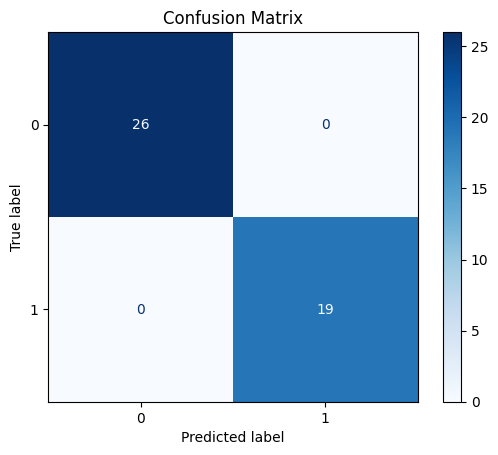

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))


Precision: 1.0
Recall: 1.0
F1-Score: 1.0


13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance

In [14]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)
print("Balanced class weight Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Balanced class weight Accuracy: 1.0


14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

titanic = pd.read_csv('titanic.csv')
titanic = titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1)
titanic.fillna(titanic.median(numeric_only=True), inplace=True)

# Encode categorical columns
for col in titanic.select_dtypes(include=['object']):
    titanic[col] = LabelEncoder().fit_transform(titanic[col])

X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
print("Titanic accuracy:", accuracy_score(y_test, model.predict(X_test)))


15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model_scaled = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train_scaled)
model_raw = LogisticRegression(max_iter=1000).fit(X_train, y_train)

print("Accuracy (raw):", accuracy_score(y_test, model_raw.predict(X_test)))
print("Accuracy (scaled):", accuracy_score(y_test_scaled, model_scaled.predict(X_test_scaled)))


Accuracy (raw): 1.0
Accuracy (scaled): 1.0


16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score

In [17]:
from sklearn.metrics import roc_auc_score

model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print('ROC-AUC:', roc_auc_score(y_test, y_pred_prob))


ROC-AUC: 1.0


17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy

In [18]:
model = LogisticRegression(C=0.5, max_iter=1000)
model.fit(X_train, y_train)
print('Accuracy (C=0.5):', accuracy_score(y_test, model.predict(X_test)))


Accuracy (C=0.5): 1.0


18. Write a Python program to train Logistic Regression and identify important features based on model coefficients

In [ ]:
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print(feature_importance)


 19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score

In [20]:
from sklearn.metrics import cohen_kappa_score

model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
print('Cohen’s Kappa:', cohen_kappa_score(y_test, model.predict(X_test)))


Cohen’s Kappa: 1.0


20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification

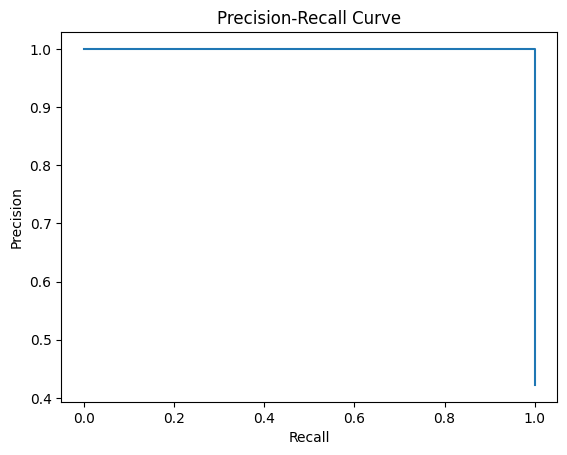

In [21]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy

In [22]:
for solver in ['liblinear', 'saga', 'lbfgs']:
    model = LogisticRegression(solver=solver, max_iter=1000)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{solver} solver accuracy:", acc)


liblinear solver accuracy: 1.0
saga solver accuracy: 1.0
lbfgs solver accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC)

In [23]:
from sklearn.metrics import matthews_corrcoef

model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
mcc = matthews_corrcoef(y_test, model.predict(X_test))
print('MCC:', mcc)


MCC: 1.0


23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling

In [24]:
model_raw = LogisticRegression(max_iter=1000).fit(X_train, y_train)
raw_acc = accuracy_score(y_test, model_raw.predict(X_test))

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train)
scaled_acc = accuracy_score(y_test, model_scaled.predict(X_test_scaled))

print('Accuracy raw:', raw_acc)
print('Accuracy scaled:', scaled_acc)


Accuracy raw: 1.0
Accuracy scaled: 1.0


24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation

In [25]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
gs = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
gs.fit(X_train, y_train)
print('Best C:', gs.best_params_['C'], 'Accuracy:', gs.best_score_)


Best C: 0.1 Accuracy: 1.0


25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions

In [26]:
import joblib

model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
joblib.dump(model, 'logistic_model.pkl')

# Load
loaded_model = joblib.load('logistic_model.pkl')
print('Loaded model Accuracy:', accuracy_score(y_test, loaded_model.predict(X_test)))


Loaded model Accuracy: 1.0
